Lets do this in 2D, we want to look at orbital motion

In [1]:
#include the usuals
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import math as math
from matplotlib import animation, rc
from IPython.display import HTML

In [34]:
def gravity(iM1,iM2,iX1,iY1,iX2,iY2):
    pR2=(iX1-iX2)*(iX1-iX2)+(iY1-iY2)*(iY1-iY2)+0.001
    FR=-iM2/pR2
    #Get the X and Y projections
    pX=(iX1-iX2)/math.sqrt(pR2)
    pY=(iY1-iY2)/math.sqrt(pR2)
    return FR*pX,FR*pY

def grav_array(iM1=1,iM2=5,iDT=0.0001,iN=100000,iX10=[10,1],idX10=[1,1],iX20=[0,0],idX20=[0,0]):
    t=[]
    x1=[]
    y1=[]
    x2=[]
    y2=[]
    dt=iDT
    pX1Old = [0,0]
    pX2Old = [0,0]
    pdX1Old = [0,0]
    pdX2Old = [0,0]
    pX1Old[0] = 0
    pX1Old[1] = 1
    pX2Old[0] = 0
    pX2Old[1] = -1
    pdX1Old[0]= 0.25
    pdX1Old[1]= 0
    pdX2Old[0]= -0.25
    pdX2Old[1]= 0
    for i0 in range(iN):
        pT=i0*dt
        dX1,dY1=gravity(iM1,iM2,pX1Old[0],pX1Old[1],pX2Old[0],pX2Old[1])
        pdX1Old[0]=pdX1Old[0]+dt*dX1
        pdX1Old[1]=pdX1Old[1]+dt*dY1
        pX1Old [0]=pX1Old[0]+dt*pdX1Old[0]+0.5*dt*dt*dX1
        pX1Old [1]=pX1Old[1]+dt*pdX1Old[1]+0.5*dt*dt*dY1

        dX2,dY2=gravity(iM2,iM1,pX2Old[0],pX2Old[1],pX1Old[0],pX1Old[1])
        pdX2Old[0]=pdX2Old[0]+dt*dX2
        pdX2Old[1]=pdX2Old[1]+dt*dY2
        pX2Old [0]=pX2Old[0]+dt*pdX2Old[0]+0.5*dt*dt*dX2
        pX2Old [1]=pX2Old[1]+dt*pdX2Old[1]+0.5*dt*dt*dY2
        t.append(pT)
        x1.append(pX1Old[0])
        x2.append(pX2Old[0])
        y1.append(pX1Old[1])
        y2.append(pX2Old[1])
    return t,x1,y1,x2,y2

<IPython.core.display.Javascript object>


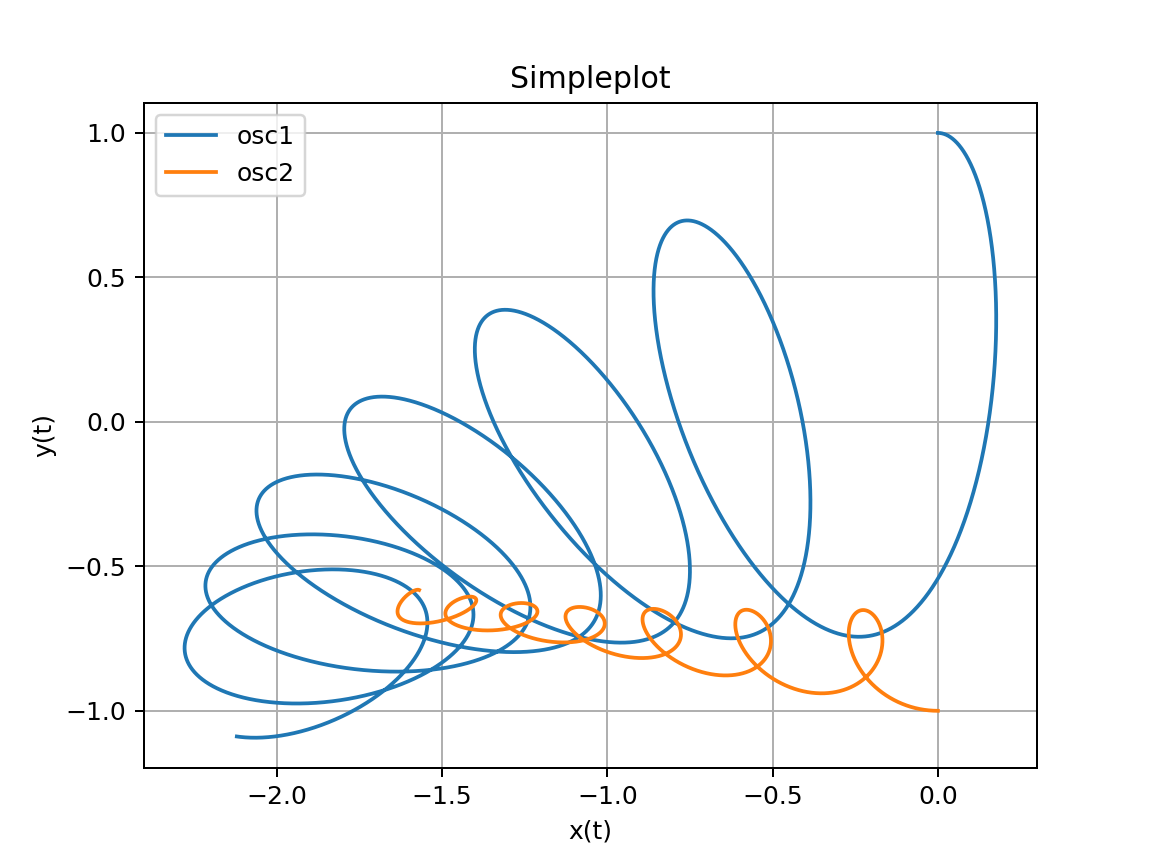

In [35]:
fig, ax = pl.subplots()
tout1,xout1,yout1,xout2,yout2=grav_array()
#print(xout1)
ax.plot(xout1,yout1,label='osc1')
ax.plot(xout2,yout2,label='osc2')
ax.set(xlabel='x(t)', ylabel='y(t)',title='Simpleplot')
ax.grid()
pl.legend()
pl.show()

In [15]:
import matplotlib.animation as animation 
from IPython.display import HTML
pl.rcParams['animation.html'] = 'html5'
pl.rcParams['animation.embed_limit'] = 1024

fig, ax = pl.subplots()
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = xout1[i:(i+100)]
    y = yout1[i:(i+100)]
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=10, interval=20, blit=True)
HTML(anim.to_html5_video())


<IPython.core.display.Javascript object>

AttributeError: 'NoneType' object has no attribute '_send_event'

In [10]:
anim._repr_html_() is None
anim
rc('animation', html='html5')

AttributeError: 'NoneType' object has no attribute '_send_event'

In [21]:
fig, ax = pl.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=100, interval=20, blit=True)
HTML(anim.to_html5_video())
anim._repr_html_() is None



<IPython.core.display.Javascript object>

AttributeError: 'NoneType' object has no attribute '_send_event'

In [20]:
rc('animation', html='html5')

